# **页面基础设置**→→务必加载云端存储空间！！！！！！！

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AErZu7TLiElpZypNN59Rc1ndlo9UBq98Zz8zWa05585AqWp_nECkxg
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/UTC&MTC/Conference Code/XCC_File

/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File


In [ ]:
!pip install pydot

In [ ]:
!pip install --upload keras


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upload


In [1]:
!pip list

Package                       Version        
----------------------------- ---------------
absl-py                       0.8.1          
alabaster                     0.7.12         
albumentations                0.1.12         
altair                        4.1.0          
argon2-cffi                   20.1.0         
asgiref                       3.2.10         
astor                         0.8.1          
astropy                       4.0.1.post1    
astunparse                    1.6.3          
atari-py                      0.2.6          
atomicwrites                  1.4.0          
attrs                         20.1.0         
audioread                     2.1.8          
autograd                      1.3            
Babel                         2.8.0          
backcall                      0.2.0          
beautifulsoup4                4.6.3          
bleach                        3.1.5          
blis                          0.4.1          
bokeh                         2.1.

# ***单变量时序信号的故障预测***

## **数据重组：**
数据先按照发动机编号（也即‘unit')进行分组，然后提取各个变量进行重组


### 数据加载、可视化、清洗、归一化、辅助变量计算

In [1]:
# 数据加载

import pandas as pd
df_train = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/train_FD001.txt", sep = ' ', header = None)
df_test = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/test_FD001.txt", sep = ' ', header = None)

col_list = ['unit', 'time', 'os_1', 'os_2', 'os_3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']

df_train = df_train[list(range(26))]
df_train.columns = col_list

df_test = df_test[list(range(26))]
df_test.columns = col_list
#print(df_test.shape[0])
df_test.head()

# 数据可视化


# 去除无关变量
new_col_list = ['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
df_train = df_train[new_col_list]
df_test = df_test[new_col_list]


# 归一化
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    columns_0_4 = columns[:4]
    print(columns_0_4)
    for c in columns:
      if c in columns_0_4:
        print('yes')
        newDataFrame[c] = df[c]
        continue
      d =  df[c]
      MAX = d.max()
      MIN = d.min()
      newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
df_train_normalized = regularit(df_train)
print(df_train_normalized.shape[0],df_train_normalized.columns)
#print(df_train_normalized.head())

df_test_normalized = regularit(df_test)
print(df_test_normalized.shape[0],df_test_normalized.columns)
#print(df_test_normalized.head())

# 辅助变量计算
def number_fault_function(df_normalized):  #该函数可以用groupby函数一行解决→→df_normalized.groupby('unit').max()['time']
  df_xcc = df_normalized.copy()
  number_fault = []
  number_no_fault = []
  #print(df_train_xcc.head())
  for i in range(1,df_xcc.shape[0]):
    if df_xcc.loc[i,'time']<df_xcc.loc[i-1,'time']:
      number_fault.append(i-1)
    else:
      number_no_fault.append(i)
  number_fault.append(df_xcc.shape[0]-1)
  return number_fault

print(len(number_fault_function(df_train_normalized)))


['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
20631 Index(['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7',
       'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17',
       'sm_20', 'sm_21'],
      dtype='object')
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
13096 Index(['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7',
       'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17',
       'sm_20', 'sm_21'],
      dtype='object')
100


### 按'unit'分组并保存为CSV文件


In [3]:
def groupby_unit_list(df_normalized, variable_name):

  number_fault = number_fault_function(df_normalized)
  seq_length_selected = min(df_normalized.groupby('unit').max()['time'])
  #number_fault = number_fault_function(df_normalized)
  df_grouped = pd.DataFrame()
  number_selected = []
  temp = []
  j = 1
  for i in range(df_normalized.shape[0]+1):
    temp.append(i)
    if i in number_fault:
      #print(len(temp[-seq_length_selected:-1]))
      #print(temp[-seq_length_selected:-1],'\n',temp[-1],'\n',i)
      #number_selected.extend(temp[-seq_length_selected:-1])
      #print(len(number_selected),'\n',number_selected)

      # 此处需要搞清楚一个问题，到底是通过前m个数据预测最后的结果还是？
      df_list_temp = df_normalized.loc[temp[:seq_length_selected],variable_name].tolist()  
      #print(df_temp.shape, '\n', df_temp.head(733))

      df_grouped[variable_name+'_unit_'+str(j)] = df_list_temp
      #print(df_grouped.shape,'\n',df_grouped.head(733),'\n\n\n')
      j = j+1

  return df_grouped

def csv_generate(df_normalized, path_plus):
  for variable_name in df_normalized.columns.tolist()[4:-1]:
    df_ = groupby_unit_list(df_normalized, variable_name)
    print(df_.shape)
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_

def csv_generate_label(df_normalized, path_plus):

  sm_columns = df_normalized.columns.tolist()[4:]
  for variable_name in df_normalized.columns.tolist()[4:]:
    df_ = groupby_unit_list(df_normalized, variable_name)
    df_ = df_.T
    df_['label'] = df_normalized.groupby('unit').max()['time'].tolist()

    #print(df_)
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_, sm_columns



_, sm_columns = csv_generate_label(df_train_normalized, 'train/')
global sm_columns

## **LSTM_单变量时间序列预测**

！！！重要说明！！！

train_FD001.txt和test_FD001.txt的数据尺寸不一致。
因此先对train_FD001.txt进行训练集和测试集划分，再进一步实现独立划分。


### Data from train_FD001.txt（本节工作主要用于测试和调试模型）
训练集和测试集来自同一个文件train_FD001.txt，本节主要用于测试和调试模型

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the 

(70, 128, 1) 
 (70, 1) 
 (30, 128, 1) 
 (30, 1) 

(70, 128, 1) 
 (70, 1) 
 (30, 128, 1) 
 (30, 1) 

Epoch 1/20
4/4 - 0s - loss: 42582.0781 - val_loss: 49541.4180
Epoch 2/20
4/4 - 0s - loss: 42537.2422 - val_loss: 49472.3750
Epoch 3/20
4/4 - 0s - loss: 42454.0898 - val_loss: 49315.2852
Epoch 4/20
4/4 - 0s - loss: 42210.5938 - val_loss: 48604.8633
Epoch 5/20
4/4 - 0s - loss: 41324.8945 - val_loss: 47591.7930
Epoch 6/20
4/4 - 0s - loss: 40570.2305 - val_loss: 47100.3242
Epoch 7/20
4/4 - 0s - loss: 40179.2695 - val_loss: 46772.1680
Epoch 8/20
4/4 - 0s - loss: 39889.3281 - val_loss: 46482.3906
Epoch 9/20
4/4 - 0s - loss: 39624.9805 - val_loss: 46207.0586
Epoch 10/20
4/4 - 0s - loss: 39373.1445 - val_loss: 45945.7148
Epoch 11/20
4/4 - 0s - loss: 39135.8828 - val_loss: 45703.4727
Epoch 12/20
4/4 - 0s - loss: 38917.5781 - val_loss: 45483.3828
Epoch 13/20
4/4 - 0s - loss: 38719.9922 - val_loss: 45285.0898
Epoch 14/20
4/4 - 0s - loss: 38542.0078 - val_loss: 45106.0547
Epoch 15/20
4/4 - 0s - loss

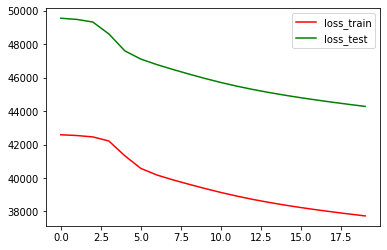

Test MSE: 44276.331
Test MAE: 204.091
Test R2: -15.878
Test RMSE: 210.419
Test Offical Score: 161815564704.467
Accuracy: 0.000


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time


def load_dataset(variable_name):
  
  path_ = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/'
  path_train = path_ + 'train/' + 'df_grouped_' + variable_name + '.csv'
  path_test = path_ + 'test/' + 'df_grouped_' + variable_name + '.csv'

  # 对训练集按7：3划分train_data和test_data
  
  df_train = pd.read_csv(path_train)

  #df_train = preprocessing.scale(df_train)
  X_train = np.dstack([preprocessing.scale(df_train.iloc[:70,1:-1])]) # (70,128) →reshape→ （70，128，1）
  y_train = df_train.iloc[:70,-1].values.reshape((70,1))
  
  X_test = np.dstack([preprocessing.scale(df_train.iloc[70:,1:-1])]) # (30,128) →reshape→ （30，128，1）
  y_test = df_train.iloc[70:,-1].values.reshape((30,1))
  

  # 填充test_data
  '''
  df_train = pd.read_csv(path_train)
  X_train = np.dstack([df_train.iloc[:,1:-1]]) # (100,128) →reshape→ （100，128，1）
  y_train = df_train.iloc[:,-1].values.reshape((100,1))

  df_test = pd.read_csv(path_test)
  X_test = np.dstack([df_test.iloc[:,1:-1]]) 
  y_test = df_test.iloc[:,-1].values.reshape((100,1))
  X_test = pad_sequences(X_test,maxlen=128,value=0,padding='post')
  #y_test = sequence.pad_sequence(y_test,maxlen=128,value=0,padding='post')
  '''
  print(X_train.shape, '\n', y_train.shape, '\n', X_test.shape, '\n', y_test.shape, '\n')
  
  X_train = X_train.astype('float64')
  y_train = y_train.astype('int')
  X_test = X_test.astype('float64')
  y_test = y_test.astype('int')

  #print(y_test)
  return X_train, y_train, X_test, y_test

load_dataset('sm_2')


def Evaluate_Loss(train_X,train_y,test_X,test_y):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]
  model = Sequential()
  model.add(CuDNNLSTM(50, input_shape=(n_timesteps, n_features)))
  # model.add(Dropout(0.5))
  # model.add(Dense(50, activation='relu'))
  model.add(Dense(n_outputs))
  model.compile(loss='mse', optimizer='adam')
  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=20,\
            validation_data=(test_X, test_y), verbose=2, shuffle=False)
  print(history.history)

  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/' + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/' + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()

  # save model
  # 保存模型 model.save(file_path)
  model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
  LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)

  # draw the diagram of model topology
  # 保存模型图

  # 需要安装pip install pydot

  LSTM_plot_dir = '{}/model_Figure/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)



  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)

  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)

  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)

  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)

  score_unit = []
  for d in [pred_y[i]-test_y[i][0] for i in range(len(pred_y))]:
    if d<0:
      score_unit.append(exp(-(d/13.0))-1)
    else:
      score_unit.append(exp((d/10.0))-1)
  offical_score = sum(score_unit)
  print('Test Offical Score: %.3f' % offical_score)

  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0]) <=20:
      count_number = count_number + 1
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9
  return offical_score, rmse, mse, mae, r2, acc


def generate_loss_csv(sm_columns):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'Acc'])
  for variable_name in sm_columns:
    X_train, y_train, X_test, y_test = load_dataset(variable_name)
    offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(X_train, y_train, X_test, y_test)
    df_loss[variable_name] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/' + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')


EPOCHS = 20
global EPOCHS
# generate_loss_csv(sm_columns)
generate_loss_csv(['sm_21'])

### Data from train_FD001.txt & test_FD001.txt
训练集和测试集分别来自文件train_FD001.txt和文件test_FD001.txt

#### 重新生成数据


In [ ]:
# 必要的包
import pandas as pd
import numpy as np
from sklearn import preprocessing
# 数据加载
df_train = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/train_FD001.txt", sep = ' ', header = None)
df_test = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/test_FD001.txt", sep = ' ', header = None)
print(df_train.shape, df_test.shape)

# 针对某个变量按unit编号提取数据
## 加表头
col_list = ['unit', 'time', 'os_1', 'os_2', 'os_3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']
df_train = df_train[list(range(26))]
df_train.columns = col_list
df_test = df_test[list(range(26))]
df_test.columns = col_list
## 保留有效变量
new_col_list = ['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', \
                'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
df_train = df_train[new_col_list]
df_test = df_test[new_col_list]
sm_columns = new_col_list[4:]
global sm_columns
## 归一化
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    columns_0_4 = columns[:4]
    print(columns_0_4)
    for c in columns:
      if c in columns_0_4:
        print('yes')
        newDataFrame[c] = df[c]
        continue
      d = df[c]
      MAX = d.max()
      MIN = d.min()
      newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
df_train_normalized = regularit(df_train)
df_test_normalized = regularit(df_test)
## 确定序列总长度
max_length_train = max(df_train_normalized.groupby('unit').max()['time'])  # max_length_train = 362
max_length_test = max(df_test_normalized.groupby('unit').max()['time'])   # max_length_test = 303
max_length_selected = max(max_length_train,max_length_test)         # max_length_selected = 362
global max_length_selected
## 辅助变量计算
def number_fault_function(df_normalized):  #该函数可以用groupby函数一行解决→→df_normalized.groupby('unit').max()['time']
  df_xcc = df_normalized.copy()
  number_fault = []
  number_no_fault = []
  #print(df_train_xcc.head())
  for i in range(1,df_xcc.shape[0]):
    if df_xcc.loc[i,'time']<df_xcc.loc[i-1,'time']:
      number_fault.append(i-1)
    else:
      number_no_fault.append(i)
  number_fault.append(df_xcc.shape[0]-1)
  return number_fault
## 重组得到某个变量的df   其中，shape = (unit_numbers, max_length_selected) = (100, 362)
def X_train_test(df_normalized, variable_name):
  # 得到样本量和时间序列长度
  n_samples = df_normalized.shape[0]
  n_time_steps = df_normalized.shape[1]

  # 得到X（X_train和X_test），检查并修改维度
  number_fault = number_fault_function(df_normalized)

  X = pd.DataFrame(columns = range(max_length_selected))

  for i in range(len(number_fault)):  
    unit_engine = i
    if i == 0:
      list_temp = df_normalized.loc[:number_fault[i],variable_name].to_list()
    else:
      list_temp = df_normalized.loc[number_fault[i-1]+1:number_fault[i],variable_name].to_list()
    # print('\n')
    # print(len(list_temp))
    # print(max_length_selected)
    list_unit_engine_variable = list_temp + [0.]*(max_length_selected-len(list_temp))
    # print(len(list_unit_engine_variable))
    X.loc['unit_' + str(unit_engine)] = list_unit_engine_variable

  # X（X_train和X_test）标准化by preprocessing.scale
  # df_grouped.values.reshape((n_samples,n_time_steps))

  X = np.dstack([preprocessing.scale(X)])

  print('X.shape:', X.shape)   #, '\n',X.head(), '\n\n')  # X_train, X_train

  return X
train_X = X_train_test(df_train_normalized, 'sm_2').astype('float64')
test_X = X_train_test(df_test_normalized, 'sm_2').astype('float64')

def y_train_test(df_normalized):
  # 得到y（y_train和y_test），检查并修改维度
  y = df_normalized.groupby('unit').max()['time'].values.reshape((100,1))   # 也即y_train, y_test
  print('y.shape:', y.shape)
  return y
train_y = y_train_test(df_train_normalized).astype('int')
test_y = y_train_test(df_test_normalized).astype('int')


def csv_X_y(X,y,path_plus):   # 数据是等长的，后续需要用Masking

  sm_columns_equ = df_grouped.columns.tolist()[4:-1]
  for variable_name in df_grouped.columns.tolist()[4:-1]:
    df_ = X_train_test(df_grouped, variable_name)
    df_['label'] = df_grouped.groupby('unit').max()['time'].tolist()

    print(df_.head())
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_, sm_columns

# _, sm_columns_equ = csv_generate_label_equ(df_train_grouped, 'train/')



(20631, 28) (13096, 28)
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
X.shape: (100, 362, 1)
X.shape: (100, 362, 1)
y.shape: (100, 1)
y.shape: (100, 1)


#### 单变量不等长时间序列预测(单层&多层LSTM）

调试记录：
输入数据为已经处理后的等长序列，就Masking的使用效果进行比对：

①不使用Masking，可以使用CuDNNLSTM

offical_score, rmse, mse, mae, r2, acc

=offical_score, rmse, mse, mae, r2, acc




②使用Masking，无法使用CuDNNLSTM

offical_score, rmse, mse, mae, r2, acc

=offical_score, rmse, mse, mae, r2, acc


X.shape: (100, 362, 1)
X.shape: (100, 362, 1)
y.shape: (100, 1)
y.shape: (100, 1)
Epoch 1/30
5/5 - 1s - loss: 44427.3359 - val_loss: 18832.5938
Epoch 2/30
5/5 - 0s - loss: 42220.5469 - val_loss: 17938.7949
Epoch 3/30
5/5 - 0s - loss: 41170.3242 - val_loss: 17657.9551
Epoch 4/30
5/5 - 0s - loss: 40593.9766 - val_loss: 17198.4648
Epoch 5/30
5/5 - 0s - loss: 40169.3711 - val_loss: 17015.0176
Epoch 6/30
5/5 - 0s - loss: 39749.9805 - val_loss: 16885.7754
Epoch 7/30
5/5 - 0s - loss: 39541.0547 - val_loss: 16742.1973
Epoch 8/30
5/5 - 0s - loss: 39337.4297 - val_loss: 16600.8281
Epoch 9/30
5/5 - 0s - loss: 38987.4844 - val_loss: 16221.1055
Epoch 10/30
5/5 - 0s - loss: 38424.1875 - val_loss: 15967.2695
Epoch 11/30
5/5 - 0s - loss: 38091.2344 - val_loss: 15810.7188
Epoch 12/30
5/5 - 0s - loss: 37831.8281 - val_loss: 15662.0400
Epoch 13/30
5/5 - 0s - loss: 37587.5156 - val_loss: 15513.1426
Epoch 14/30
5/5 - 0s - loss: 37349.2812 - val_loss: 15384.4287
Epoch 15/30
5/5 - 0s - loss: 37134.9141 - val

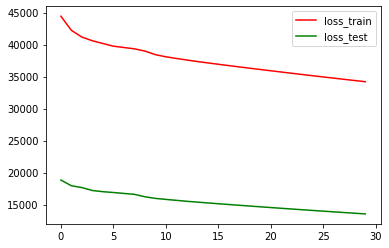

totally cost 34.68696880340576


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time

def load_dataset(variable_name):
  train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
  test_X = X_train_test(df_test_normalized, variable_name).astype('float64')

  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  return train_X, train_y, test_X, test_y 

def Evaluate_Loss(train_X,train_y,test_X,test_y):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]

  model = Sequential()
  # model.add(Masking(mask_value=0., input_shape=(n_timesteps, n_features)))   # , padding='post'
  model.add(CuDNNLSTM(units=200, return_sequences = True, input_shape=(n_timesteps, n_features)))    # CuDNN
  model.add(Dropout(0.5))
  model.add(CuDNNLSTM(units=200, return_sequences = True))   #  , input_shape=(100, n_features)
  model.add(Dropout(0.5))
  model.add(CuDNNLSTM(units=100))    # , input_shape=(50, n_features)
  # model.add(Flatten())
  # model.add(BatchNormalization())
  # model.add(Dense(units=10, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dense(n_outputs))
  model.compile(loss='mse', optimizer='adam')


  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=20,\
            validation_data=(test_X, test_y), verbose=2, shuffle=False)
  # model.summary()
  model.summary()

  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)

  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)

  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)

  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)

  score_unit = []
  for d in [pred_y[i]-test_y[i][0] for i in range(len(pred_y))]:
    if d<0:
      score_unit.append(exp(-(d/13.0))-1)
    else:
      score_unit.append(exp((d/10.0))-1)
  offical_score = sum(score_unit)
  print('Test Offical Score: %.3f' % offical_score)

  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0]) <=20:
      count_number = count_number + 1
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9

  # save model
  # 保存模型 model.save(file_path)
  model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
  LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)

  # draw the diagram of model topology
  # 保存模型图

  # 需要安装pip install pydot

  LSTM_plot_dir = '{}/model_Figure/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)

  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()

  return offical_score, rmse, mse, mae, r2, acc


def generate_loss_csv(sm_columns):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  for variable_name in sm_columns:
    train_X, train_y, test_X, test_y = load_dataset(variable_name)
    offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
    df_loss[variable_name] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')

time_start=time.time()

EPOCHS = 30
global EPOCHS
generate_loss_csv(['sm_2'])

time_end=time.time()
print('totally cost',time_end-time_start)


#### 模型加载、测试及优化

In [ ]:
# 加载已经保存的模型进行训练
from tensorflow.kears.model import load_model
model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
model_loaded = load_model(LSTM_dir)


## **LSTM_多变量时间序列预测**

### 重新生成数据

In [ ]:
# 必要的包
import pandas as pd
import numpy as np
from sklearn import preprocessing
# 数据加载
df_train = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/train_FD001.txt", sep = ' ', header = None)
df_test = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/test_FD001.txt", sep = ' ', header = None)
print(df_train.shape, df_test.shape)

# 针对某个变量按unit编号提取数据
## 加表头
col_list = ['unit', 'time', 'os_1', 'os_2', 'os_3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']
df_train = df_train[list(range(26))]
df_train.columns = col_list
df_test = df_test[list(range(26))]
df_test.columns = col_list
## 保留有效变量
new_col_list = ['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', \
                'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
df_train = df_train[new_col_list]
df_test = df_test[new_col_list]
sm_columns = new_col_list[4:]
global sm_columns
## 归一化
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    columns_0_4 = columns[:4]
    print(columns_0_4)
    for c in columns:
      if c in columns_0_4:
        print('yes')
        newDataFrame[c] = df[c]
        continue
      d = df[c]
      MAX = d.max()
      MIN = d.min()
      newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
df_train_normalized = regularit(df_train)
df_test_normalized = regularit(df_test)
## 确定序列总长度
max_length_train = max(df_train_normalized.groupby('unit').max()['time'])  # max_length_train = 362
max_length_test = max(df_test_normalized.groupby('unit').max()['time'])   # max_length_test = 303
max_length_selected = max(max_length_train,max_length_test)         # max_length_selected = 362
global max_length_selected
## 辅助变量计算
def number_fault_function(df_normalized):  #该函数可以用groupby函数一行解决→→df_normalized.groupby('unit').max()['time']
  df_xcc = df_normalized.copy()
  number_fault = []
  number_no_fault = []
  #print(df_train_xcc.head())
  for i in range(1,df_xcc.shape[0]):
    if df_xcc.loc[i,'time']<df_xcc.loc[i-1,'time']:
      number_fault.append(i-1)
    else:
      number_no_fault.append(i)
  number_fault.append(df_xcc.shape[0]-1)
  return number_fault
## 重组得到某个变量的df   其中，shape = (unit_numbers, max_length_selected) = (100, 362)
def X_train_test(df_normalized, variable_name):
  # 得到样本量和时间序列长度
  n_samples = df_normalized.shape[0]
  n_time_steps = df_normalized.shape[1]

  # 得到X（X_train和X_test），检查并修改维度
  number_fault = number_fault_function(df_normalized)

  X = pd.DataFrame(columns = range(max_length_selected))

  for i in range(len(number_fault)):  
    unit_engine = i
    if i == 0:
      list_temp = df_normalized.loc[:number_fault[i],variable_name].to_list()
    else:
      list_temp = df_normalized.loc[number_fault[i-1]+1:number_fault[i],variable_name].to_list()
    # print('\n')
    # print(len(list_temp))
    # print(max_length_selected)
    list_unit_engine_variable = list_temp + [0.]*(max_length_selected-len(list_temp))
    # print(len(list_unit_engine_variable))
    X.loc['unit_' + str(unit_engine)] = list_unit_engine_variable

  # X（X_train和X_test）标准化by preprocessing.scale
  # df_grouped.values.reshape((n_samples,n_time_steps))

  # X = np.dstack([preprocessing.scale(X)])

  print('X.shape:', X.shape)   #, '\n',X.head(), '\n\n')  # X_train, X_train

  return X
train_X = X_train_test(df_train_normalized, 'sm_2').astype('float64')
test_X = X_train_test(df_test_normalized, 'sm_2').astype('float64')

def y_train_test(df_normalized):
  # 得到y（y_train和y_test），检查并修改维度
  y = df_normalized.groupby('unit').max()['time'].values.reshape((100,1))   # 也即y_train, y_test
  print('y.shape:', y.shape)
  return y
train_y = y_train_test(df_train_normalized).astype('int')
test_y = y_train_test(df_test_normalized).astype('int')


def csv_X_y(X,y,path_plus):   # 数据是等长的，后续需要用Masking

  sm_columns_equ = df_grouped.columns.tolist()[4:-1]
  for variable_name in df_grouped.columns.tolist()[4:-1]:
    df_ = X_train_test(df_grouped, variable_name)
    df_['label'] = df_grouped.groupby('unit').max()['time'].tolist()

    print(df_.head())
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_, sm_columns

# _, sm_columns_equ = csv_generate_label_equ(df_train_grouped, 'train/')



(20631, 28) (13096, 28)
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)


### 必要的数据处理过程

In [ ]:
# 先运行LSTM_多变量时间序列预测的"重新生成数据"单元格，加载相关函数

# 生成n_timesteps = 360的数据
def load_dataset_mc_(sm_columns_):
  list_train_X = []
  list_test_X = []
  for variable_name in sm_columns_:
    train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
    list_train_X.append(train_X)

    test_X = X_train_test(df_test_normalized, variable_name).astype('float64')
    list_test_X.append(test_X)

  train_X = np.stack(tuple(list_train_X),axis=2)
  test_X = np.stack(tuple(list_test_X),axis=2)

  # 对n_timesteps维度进行截取
  train_X = train_X[:, :360, :]
  test_X = test_X[:, :360, :]


  # train_X = np.array(list_train_X)
  # test_X = np.array(list_test_X)
  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')
  
  print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')

  return train_X, train_y, test_X, test_y 

train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)
print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')

X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 

(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 



### 多变量不等长时间序列预测

X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 

Epoch 1/300
5/5 - 2s - loss: 43783.5117 - val_loss: 18513.9844
Epoch 2/300
5/5 - 0s - loss: 41849.2344 - val_loss: 17724.6250
Epoch 3/300
5/5 - 0s - loss: 40736.2344 - val_loss: 17174.3008
Epoch 4/300
5/5 - 0s - loss: 39987.6484 - val_loss: 16863.3926
Epoch 5/300
5/5 - 0s - loss: 39550.1602 - val_loss: 1666

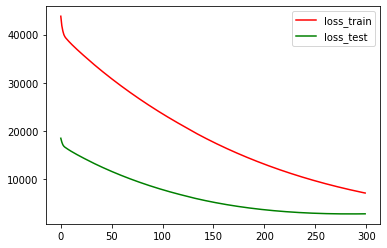

totally cost 117.67181944847107


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time

def load_dataset(variable_name):
  train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
  test_X = X_train_test(df_test_normalized, variable_name).astype('float64')

  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  return train_X, train_y, test_X, test_y 

def Evaluate_Loss(train_X,train_y,test_X,test_y):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]

  model = Sequential()
  model.add(Masking(mask_value=0., input_shape=(n_timesteps, n_features)))   # , padding='post'
  model.add(LSTM(units=200, return_sequences = True, input_shape=(n_timesteps, n_features)))    # CuDNN
  model.add(Dropout(0.5))
  model.add(LSTM(units=200, return_sequences = True))   #  , input_shape=(100, n_features)
  model.add(Dropout(0.5))
  model.add(LSTM(units=100))    # , input_shape=(50, n_features)
  # model.add(Flatten())
  # model.add(BatchNormalization())
  # model.add(Dense(units=10, activation='relu'))
  # model.add(BatchNormalization())
  model.add(Dense(n_outputs))
  model.compile(loss='mse', optimizer='adam')


  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=20,\
            validation_data=(test_X, test_y), verbose=2, shuffle=False)
  # model.summary()
  model.summary()

  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)

  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)

  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)

  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)

  score_unit = []
  for d in [pred_y[i]-test_y[i][0] for i in range(len(pred_y))]:
    if d<0:
      score_unit.append(exp(-(d/13.0))-1)
    else:
      score_unit.append(exp((d/10.0))-1)
  offical_score = sum(score_unit)
  print('Test Offical Score: %.3f' % offical_score)

  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0]) <=20:
      count_number = count_number + 1
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9

  # save model
  # 保存模型 model.save(file_path)
  model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
  LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)

  # draw the diagram of model topology
  # 保存模型图

  # 需要安装pip install pydot

  LSTM_plot_dir = '{}/model_Figure/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)

  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()

  return offical_score, rmse, mse, mae, r2, acc


# 单变量预测
def generate_loss_csv_single(sm_columns_):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  for variable_name in sm_columns_:
    train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns_)
    offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
    df_loss[variable_name] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')
  
# 多变量预测
def generate_loss_csv_mc(sm_columns_):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns_)
  offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
  df_loss['value'] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')

time_start=time.time()

EPOCHS = 300
global EPOCHS
generate_loss_csv_mc(sm_columns)

time_end=time.time()
print('totally cost',time_end-time_start)


### 模型加载、测试及优化

In [ ]:
import pandas as pd
df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
df_loss['value'] = [724877.113, 53.350, 2846.192, 43.000, -0.001, 0.300]
df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')


## **Conv-LSTM__多变量时间序列预测**

### 重新生成数据

In [4]:
# 必要的包
import pandas as pd
import numpy as np
from sklearn import preprocessing
# 数据加载
df_train = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/train_FD001.txt", sep = ' ', header = None)
df_test = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/test_FD001.txt", sep = ' ', header = None)
print(df_train.shape, df_test.shape)

# 针对某个变量按unit编号提取数据
## 加表头
col_list = ['unit', 'time', 'os_1', 'os_2', 'os_3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']
df_train = df_train[list(range(26))]
df_train.columns = col_list
df_test = df_test[list(range(26))]
df_test.columns = col_list
## 保留有效变量
new_col_list = ['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', \
                'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
df_train = df_train[new_col_list]
df_test = df_test[new_col_list]
sm_columns = new_col_list[4:]
global sm_columns
## 归一化
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    columns_0_4 = columns[:4]
    print(columns_0_4)
    for c in columns:
      if c in columns_0_4:
        print('yes')
        newDataFrame[c] = df[c]
        continue
      d = df[c]
      MAX = d.max()
      MIN = d.min()
      newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
df_train_normalized = regularit(df_train)
df_test_normalized = regularit(df_test)
## 确定序列总长度
max_length_train = max(df_train_normalized.groupby('unit').max()['time'])  # max_length_train = 362
max_length_test = max(df_test_normalized.groupby('unit').max()['time'])   # max_length_test = 303
max_length_selected = max(max_length_train,max_length_test)         # max_length_selected = 362
global max_length_selected
## 辅助变量计算
def number_fault_function(df_normalized):  #该函数可以用groupby函数一行解决→→df_normalized.groupby('unit').max()['time']
  df_xcc = df_normalized.copy()
  number_fault = []
  number_no_fault = []
  #print(df_train_xcc.head())
  for i in range(1,df_xcc.shape[0]):
    if df_xcc.loc[i,'time']<df_xcc.loc[i-1,'time']:
      number_fault.append(i-1)
    else:
      number_no_fault.append(i)
  number_fault.append(df_xcc.shape[0]-1)
  return number_fault
## 重组得到某个变量的df   其中，shape = (unit_numbers, max_length_selected) = (100, 362)
def X_train_test(df_normalized, variable_name):
  # 得到样本量和时间序列长度
  n_samples = df_normalized.shape[0]
  n_time_steps = df_normalized.shape[1]

  # 得到X（X_train和X_test），检查并修改维度
  number_fault = number_fault_function(df_normalized)

  X = pd.DataFrame(columns = range(max_length_selected))

  for i in range(len(number_fault)):  
    unit_engine = i
    if i == 0:
      list_temp = df_normalized.loc[:number_fault[i],variable_name].to_list()
    else:
      list_temp = df_normalized.loc[number_fault[i-1]+1:number_fault[i],variable_name].to_list()
    # print('\n')
    # print(len(list_temp))
    # print(max_length_selected)
    list_unit_engine_variable = list_temp + [0.]*(max_length_selected-len(list_temp))
    # print(len(list_unit_engine_variable))
    X.loc['unit_' + str(unit_engine)] = list_unit_engine_variable

  # X（X_train和X_test）标准化by preprocessing.scale
  # df_grouped.values.reshape((n_samples,n_time_steps))

  # X = np.dstack([preprocessing.scale(X)])

  print('X.shape:', X.shape)   #, '\n',X.head(), '\n\n')  # X_train, X_train

  return X
train_X = X_train_test(df_train_normalized, 'sm_2').astype('float64')
test_X = X_train_test(df_test_normalized, 'sm_2').astype('float64')

def y_train_test(df_normalized):
  # 得到y（y_train和y_test），检查并修改维度
  y = df_normalized.groupby('unit').max()['time'].values.reshape((100,1))   # 也即y_train, y_test
  print('y.shape:', y.shape)
  return y
train_y = y_train_test(df_train_normalized).astype('int')
test_y = y_train_test(df_test_normalized).astype('int')


def csv_X_y(X,y,path_plus):   # 数据是等长的，后续需要用Masking

  sm_columns_equ = df_grouped.columns.tolist()[4:-1]
  for variable_name in df_grouped.columns.tolist()[4:-1]:
    df_ = X_train_test(df_grouped, variable_name)
    df_['label'] = df_grouped.groupby('unit').max()['time'].tolist()

    print(df_.head())
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_, sm_columns

# _, sm_columns_equ = csv_generate_label_equ(df_train_grouped, 'train/')



(20631, 28) (13096, 28)
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)


### 必要的数据处理过程

In [5]:
# 先运行LSTM_多变量时间序列预测的"重新生成数据"单元格，加载相关函数

# 生成n_timesteps = 360的数据
def load_dataset_mc_(sm_columns_):
  list_train_X = []
  list_test_X = []
  for variable_name in sm_columns_:
    train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
    list_train_X.append(train_X)

    test_X = X_train_test(df_test_normalized, variable_name).astype('float64')
    list_test_X.append(test_X)

  train_X = np.stack(tuple(list_train_X),axis=2)
  test_X = np.stack(tuple(list_test_X),axis=2)

  # 对n_timesteps维度进行截取
  train_X = train_X[:, :360, :]
  test_X = test_X[:, :360, :]


  # train_X = np.array(list_train_X)
  # test_X = np.array(list_test_X)
  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')
  
  return train_X, train_y, test_X, test_y 

train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)
print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')

X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 

(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 



### 多变量不等长时间序列预测

X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 

Epoch 1/10
10/10 - 1s - loss: 40869.6445 - val_loss: 2366.5959
Epoch 2/10
10/10 - 1s - loss: 41457.2500 - val_loss: 16522.5898
Epoch 3/10
10/10 - 1s - loss: 24961.2891 - val_loss: 2659.4868
Epoch 4/10
10/10 - 1s - loss: 2645.7532 - val_loss: 2429.9324
Epoch 5/10
10/10 - 1s - loss: 1629.0403 - val_loss: 3944

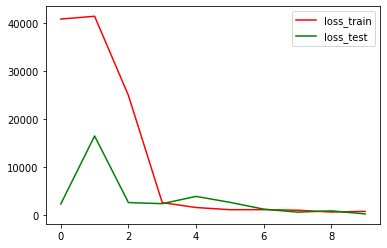

Test MSE: 296.471
Test MAE: 12.952
Test R2: 0.896
Test RMSE: 17.218
Test Offical Score: 326.675
Accuracy: 0.720
totally cost 31.11350989341736


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, TimeDistributed, ConvLSTM2D
from tensorflow.compat.v1.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime


def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time

def load_dataset_mc_(sm_columns_):
  list_train_X = []
  list_test_X = []
  for variable_name in sm_columns_:
    train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
    list_train_X.append(train_X)

    test_X = X_train_test(df_test_normalized, variable_name).astype('float64')
    list_test_X.append(test_X)

  # 增加维度n_features
  train_X = np.stack(tuple(list_train_X),axis=2)
  test_X = np.stack(tuple(list_test_X),axis=2)

  # 对n_timesteps维度进行截取
  train_X = train_X[:, :360, :]
  test_X = test_X[:, :360, :]


  # train_X = np.array(list_train_X)
  # test_X = np.array(list_test_X)
  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')

  return train_X, train_y, test_X, test_y 

# train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)


def Evaluate_Loss(train_X,train_y,test_X,test_y):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]

  # Conv-LSTM 
  # 重塑为子序列 (samples, timesteps, rows, cols, channels)
  n_steps, n_length = 20, 18   # 重塑为子序列 (samples, timesteps, rows, cols, channels)
  train_X = train_X.reshape((train_X.shape[0], n_steps, 1, n_length, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_steps, 1, n_length, n_features))

  model = Sequential()
  # model.add(Masking(mask_value=0., input_shape=(n_timesteps, n_features)))
  model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam')

  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=10,\
            validation_data=(test_X, test_y), verbose=2, shuffle=False)
  
  # save model
  # 保存模型 model.save(file_path)
  model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
  LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)

  # draw the diagram of model topology
  # 保存模型图

  # 需要安装pip install pydot
  LSTM_plot_dir = '{}/model_Figure/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)
  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()

  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)

  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)

  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)

  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)

  score_unit = []
  for d in [pred_y[i]-test_y[i][0] for i in range(len(pred_y))]:
    if d<0:
      score_unit.append(exp(-(d/13.0))-1)
    else:
      score_unit.append(exp((d/10.0))-1)
  offical_score = sum(score_unit)
  print('Test Offical Score: %.3f' % offical_score)

  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0]) <=20:
      count_number = count_number + 1
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9
  return offical_score, rmse, mse, mae, r2, acc

# 单变量预测
def generate_loss_csv_single(sm_columns_):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  for variable_name in sm_columns_:
    train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns_)
    offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
    df_loss[variable_name] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')
  
# 多变量预测
def generate_loss_csv_mc(sm_columns):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)
  offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
  df_loss['value'] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')

time_start=time.time()

EPOCHS = 10
global EPOCHS
generate_loss_csv_mc(sm_columns)

time_end=time.time()
print('totally cost',time_end-time_start)

### 模型加载、测试及优化

In [ ]:
from tensorflow.kears.model import load_model
model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/model/'
path_Conv_LSTM = model_dir + 'LSTM_model.h5'
model_loaded = load_model(LSTM_dir)



## **CNN-LSTM__多变量时间序列预测**

(探索性工作，代码有Bug）




### 重新生成数据

In [ ]:
# 必要的包
import pandas as pd
import numpy as np
from sklearn import preprocessing
# 数据加载
df_train = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/train_FD001.txt", sep = ' ', header = None)
df_test = pd.read_csv("https://raw.githubusercontent.com/sivaji1233/09_turbofan_rul/master/data/test_FD001.txt", sep = ' ', header = None)
print(df_train.shape, df_test.shape)

# 针对某个变量按unit编号提取数据
## 加表头
col_list = ['unit', 'time', 'os_1', 'os_2', 'os_3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']
df_train = df_train[list(range(26))]
df_train.columns = col_list
df_test = df_test[list(range(26))]
df_test.columns = col_list
## 保留有效变量
new_col_list = ['unit', 'time', 'os_1', 'os_2', 'sm_2', 'sm_3', 'sm_4', 'sm_6', 'sm_7', \
                'sm_8', 'sm_9', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21']
df_train = df_train[new_col_list]
df_test = df_test[new_col_list]
sm_columns = new_col_list[4:]
global sm_columns
## 归一化
def regularit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    columns_0_4 = columns[:4]
    print(columns_0_4)
    for c in columns:
      if c in columns_0_4:
        print('yes')
        newDataFrame[c] = df[c]
        continue
      d = df[c]
      MAX = d.max()
      MIN = d.min()
      newDataFrame[c] = ((d - MIN) / (MAX - MIN)).tolist()
    return newDataFrame
df_train_normalized = regularit(df_train)
df_test_normalized = regularit(df_test)
## 确定序列总长度
max_length_train = max(df_train_normalized.groupby('unit').max()['time'])  # max_length_train = 362
max_length_test = max(df_test_normalized.groupby('unit').max()['time'])   # max_length_test = 303
max_length_selected = max(max_length_train,max_length_test)         # max_length_selected = 362
global max_length_selected
## 辅助变量计算
def number_fault_function(df_normalized):  #该函数可以用groupby函数一行解决→→df_normalized.groupby('unit').max()['time']
  df_xcc = df_normalized.copy()
  number_fault = []
  number_no_fault = []
  #print(df_train_xcc.head())
  for i in range(1,df_xcc.shape[0]):
    if df_xcc.loc[i,'time']<df_xcc.loc[i-1,'time']:
      number_fault.append(i-1)
    else:
      number_no_fault.append(i)
  number_fault.append(df_xcc.shape[0]-1)
  return number_fault
## 重组得到某个变量的df   其中，shape = (unit_numbers, max_length_selected) = (100, 362)
def X_train_test(df_normalized, variable_name):
  # 得到样本量和时间序列长度
  n_samples = df_normalized.shape[0]
  n_time_steps = df_normalized.shape[1]

  # 得到X（X_train和X_test），检查并修改维度
  number_fault = number_fault_function(df_normalized)

  X = pd.DataFrame(columns = range(max_length_selected))

  for i in range(len(number_fault)):  
    unit_engine = i
    if i == 0:
      list_temp = df_normalized.loc[:number_fault[i],variable_name].to_list()
    else:
      list_temp = df_normalized.loc[number_fault[i-1]+1:number_fault[i],variable_name].to_list()
    # print('\n')
    # print(len(list_temp))
    # print(max_length_selected)
    list_unit_engine_variable = list_temp + [0.]*(max_length_selected-len(list_temp))
    # print(len(list_unit_engine_variable))
    X.loc['unit_' + str(unit_engine)] = list_unit_engine_variable

  # X（X_train和X_test）标准化by preprocessing.scale
  # df_grouped.values.reshape((n_samples,n_time_steps))

  # X = np.dstack([preprocessing.scale(X)])

  print('X.shape:', X.shape)   #, '\n',X.head(), '\n\n')  # X_train, X_train

  return X
train_X = X_train_test(df_train_normalized, 'sm_2').astype('float64')
test_X = X_train_test(df_test_normalized, 'sm_2').astype('float64')

def y_train_test(df_normalized):
  # 得到y（y_train和y_test），检查并修改维度
  y = df_normalized.groupby('unit').max()['time'].values.reshape((100,1))   # 也即y_train, y_test
  print('y.shape:', y.shape)
  return y
train_y = y_train_test(df_train_normalized).astype('int')
test_y = y_train_test(df_test_normalized).astype('int')


def csv_X_y(X,y,path_plus):   # 数据是等长的，后续需要用Masking

  sm_columns_equ = df_grouped.columns.tolist()[4:-1]
  for variable_name in df_grouped.columns.tolist()[4:-1]:
    df_ = X_train_test(df_grouped, variable_name)
    df_['label'] = df_grouped.groupby('unit').max()['time'].tolist()

    print(df_.head())
    path = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'
    df_.to_csv(path + path_plus + 'df_grouped_' + variable_name+'.csv')

  return df_, sm_columns

# _, sm_columns_equ = csv_generate_label_equ(df_train_grouped, 'train/')



(20631, 28) (13096, 28)
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
['unit', 'time', 'os_1', 'os_2']
yes
yes
yes
yes
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)


### 必要的数据处理过程

In [ ]:
# 先运行LSTM_多变量时间序列预测的"重新生成数据"单元格，加载相关函数

# 生成n_timesteps = 360的数据
def load_dataset_mc_(sm_columns_):
  list_train_X = []
  list_test_X = []
  for variable_name in sm_columns_:
    train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
    list_train_X.append(train_X)

    test_X = X_train_test(df_test_normalized, variable_name).astype('float64')
    list_test_X.append(test_X)

  train_X = np.stack(tuple(list_train_X),axis=2)
  test_X = np.stack(tuple(list_test_X),axis=2)

  # 对n_timesteps维度进行截取
  train_X = train_X[:, :360, :]
  test_X = test_X[:, :360, :]


  # train_X = np.array(list_train_X)
  # test_X = np.array(list_test_X)
  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')
  
  return train_X, train_y, test_X, test_y 

train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)


X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 



### 多变量等长时间序列预测

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, TimeDistributed, ConvLSTM2D, Conv2D
from tensorflow.compat.v1.keras.layers import Masking
from sklearn import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from math import sqrt,exp
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
import time
import pytz
from datetime import datetime


def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time

def load_dataset_mc_(sm_columns_):
  list_train_X = []
  list_test_X = []
  for variable_name in sm_columns_:
    train_X = X_train_test(df_train_normalized, variable_name).astype('float64')
    list_train_X.append(train_X)

    test_X = X_train_test(df_test_normalized, variable_name).astype('float64')
    list_test_X.append(test_X)

  # 增加维度n_features
  train_X = np.stack(tuple(list_train_X),axis=2)
  test_X = np.stack(tuple(list_test_X),axis=2)

  # 对n_timesteps维度进行截取
  train_X = train_X[:, :360, :]
  test_X = test_X[:, :360, :]


  # train_X = np.array(list_train_X)
  # test_X = np.array(list_test_X)
  train_y = y_train_test(df_train_normalized).astype('int')
  test_y = y_train_test(df_test_normalized).astype('int')

  print(train_X.shape, '\n', train_y.shape, '\n', test_X.shape, '\n', test_y.shape, '\n')

  return train_X, train_y, test_X, test_y 

# train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns)


def Evaluate_Loss(train_X,train_y,test_X,test_y):
  
  n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]

  # CNN-LSTM     
  n_steps, n_length = 20, 18   # 将数据重塑为子序列  n_timesteps = n_steps * n_length
  train_X = train_X.reshape((train_X.shape[0], n_steps, n_length, n_features))
  test_X = test_X.reshape((test_X.shape[0], n_steps, n_length, n_features))

  model = Sequential()
  # model.add(Masking(mask_value=0., input_shape=(n_timesteps, n_features)))   # , padding='post'
  model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1,3), activation='relu'), input_shape=(None,n_length,n_features)))
  model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1,3), activation='relu')))
  model.add(TimeDistributed(Dropout(0.5)))
  model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(100))   # CuDNN
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs))

  model.compile(loss='mse', optimizer='adam')

  # fit network
  history = model.fit(train_X, train_y, epochs=EPOCHS, batch_size=10,\
            validation_data=(test_X, test_y), verbose=2, shuffle=False)
  
  # save model
  # 保存模型 model.save(file_path)
  model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001'
  LSTM_dir = '{}/model/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model.h5'
  model.save(LSTM_dir)

  # draw the diagram of model topology
  # 保存模型图

  # 需要安装pip install pydot
  LSTM_plot_dir = '{}/model_Figure/'.format(model_dir) + bj_time() + '__' + str(EPOCHS) + '__' + 'LSTM_model_Figure.png'
  plot_model(model, to_file=LSTM_plot_dir, show_shapes=True)
  # plot history
  plt.plot(history.history['loss'], label='loss_train',color='r')
  # plt.plot(history.history['accuracy'], label='accuracy_train',color='b')
  plt.plot(history.history['val_loss'], label='loss_test',color='g')
  # plt.plot(history.history['val_accuracy'], label='accuracy_test',color='p')
  plt.legend()
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.svg')
  plt.savefig('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/Figure/'\
              + bj_time() + '__' + str(EPOCHS) + '__loss_and_val_loss_curve.png')
  plt.show()

  # make a prediction
  pred_y = model.predict(test_X)
  # print(pred_y)
  # calculate MSE、MAE、R2、RSME、offical_score
  
  mse = mean_squared_error(test_y, pred_y)  # 此处的mse=history.history['val_loss'][-1]
  print('Test MSE: %.3f' % mse)

  mae = mean_absolute_error(test_y, pred_y)    
  print('Test MAE: %.3f' % mae)

  r2 = r2_score(test_y, pred_y)    
  print('Test R2: %.3f' % r2)

  rmse = sqrt(mean_squared_error(test_y, pred_y))    
  print('Test RMSE: %.3f' % rmse)

  score_unit = []
  for d in [pred_y[i]-test_y[i][0] for i in range(len(pred_y))]:
    if d<0:
      score_unit.append(exp(-(d/13.0))-1)
    else:
      score_unit.append(exp((d/10.0))-1)
  offical_score = sum(score_unit)
  print('Test Offical Score: %.3f' % offical_score)

  count_number = 0
  for i in range(len(pred_y)):
    if abs(pred_y[i]-test_y[i][0]) <=20:
      count_number = count_number + 1
  acc = float(count_number)/len(pred_y)
  print('Accuracy: %.3f' % acc)
  # acc = 0.9
  return offical_score, rmse, mse, mae, r2, acc

# 单变量预测
def generate_loss_csv_single(sm_columns_):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  for variable_name in sm_columns_:
    train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns_)
    offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
    df_loss[variable_name] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')
  
# 多变量预测
def generate_loss_csv_mc(sm_columns_):
  df_loss = pd.DataFrame(index = ['offical_score', 'rmse', 'mse', 'mae', 'r2', 'acc'])
  train_X, train_y, test_X, test_y = load_dataset_mc_(sm_columns_)
  offical_score, rmse, mse, mae, r2, acc = Evaluate_Loss(train_X, train_y, test_X, test_y)
  df_loss['value'] = [offical_score, rmse, mse, mae, r2, acc]
  df_loss.to_csv('/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/loss/'\
                 + bj_time() + '__' + str(EPOCHS) + '__LSTM_losses.csv')

time_start=time.time()

EPOCHS = 10
global EPOCHS
generate_loss_csv_mc(sm_columns)

time_end=time.time()
print('totally cost',time_end-time_start)

X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
X.shape: (100, 362)
y.shape: (100, 1)
y.shape: (100, 1)
(100, 360, 15) 
 (100, 1) 
 (100, 360, 15) 
 (100, 1) 



ValueError: ignored

### 模型加载、测试及优化

In [ ]:
from tensorflow.kears.model import load_model
model_dir = '/content/drive/My Drive/UTC&MTC/Conference Code/XCC_File/XCC_File_single_equ_length_train_FD001/model/'
path_Conv_LSTM = model_dir + 'LSTM_model.h5'
model_loaded = load_model(LSTM_dir)
